In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
insurance = pd.read_csv(r"/Users/kevin/Downloads/insurance.csv")

In [3]:
insurance.shape

(1338, 7)

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance.duplicated().sum()

1

In [8]:
insurance.drop_duplicates(inplace = True)
insurance.reset_index(drop = True)  #重置索引

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [9]:
describe = insurance.describe(include = 'all').T
describe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1337.0,NaN,NaN,NaN,39.222139,14.044333,18.0,27.0,39.0,51.0,64.0
sex,1337,2,male,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1337.0,NaN,NaN,NaN,30.663452,6.100468,15.96,26.29,30.4,34.7,53.13
children,1337.0,NaN,NaN,NaN,1.095737,1.205571,0.0,0.0,1.0,2.0,5.0
smoker,1337,2,no,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1337,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1337.0,NaN,NaN,NaN,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


'\n样本集最大年龄64岁，最小年龄18岁；\n除18岁与19岁外，其余各个年龄样本数量大体相等；\n18岁与19岁的样本数量约为其余各个年龄段的两倍。\n'

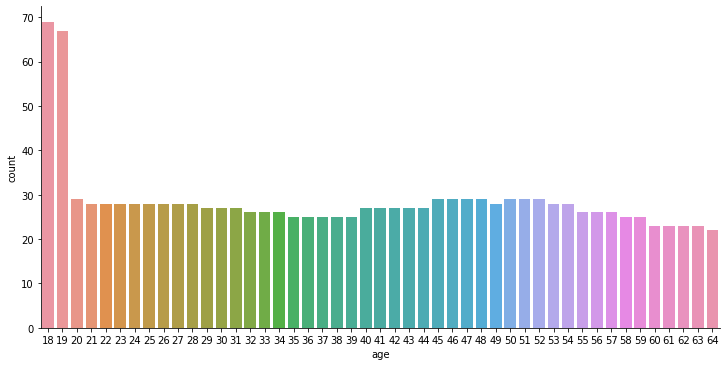

In [10]:
sn.catplot(x = 'age', data = insurance, kind = 'count', aspect = 2)

'''
样本集最大年龄64岁，最小年龄18岁；
除18岁与19岁外，其余各个年龄样本数量大体相等；
18岁与19岁的样本数量约为其余各个年龄段的两倍。
'''

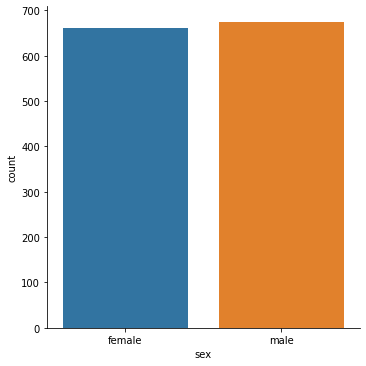

In [11]:
sn.catplot('sex', data = insurance, kind = 'count', aspect = 1)

In [12]:
insurance.bmi.value_counts()

32.300    13
28.310     9
30.800     8
34.100     8
28.880     8
          ..
44.745     1
26.070     1
27.300     1
37.715     1
29.200     1
Name: bmi, Length: 548, dtype: int64

'\nbmi呈现出正态分布的特点。\n'

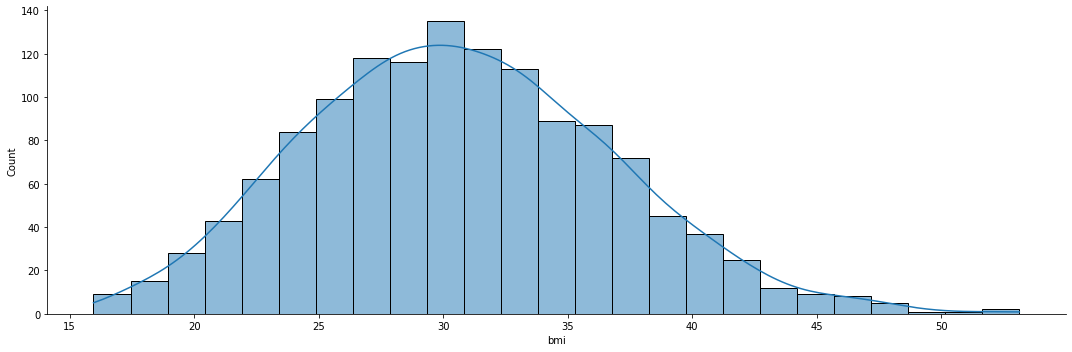

In [13]:
sn.displot(insurance['bmi'], kde = True, aspect = 3)
'''
bmi呈现出正态分布的特点。
'''

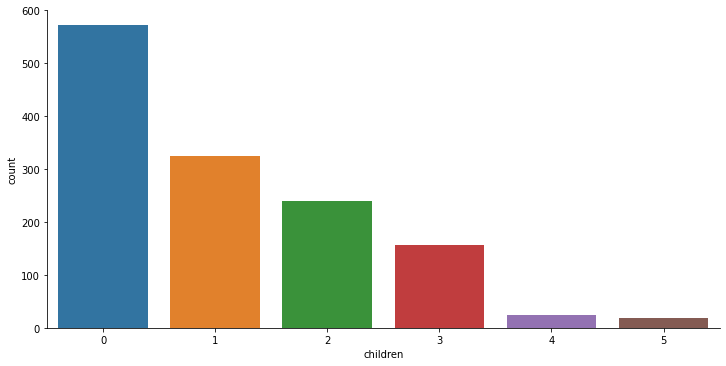

In [14]:
sn.catplot('children', data = insurance, kind = 'count', aspect = 2)

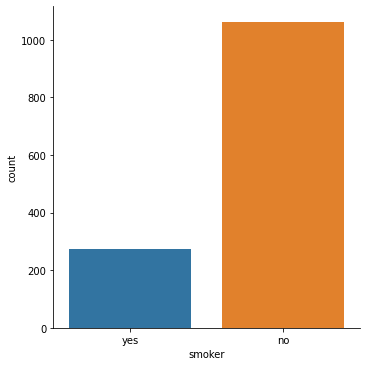

In [15]:
sn.catplot('smoker', data = insurance, kind = 'count', aspect = 1)

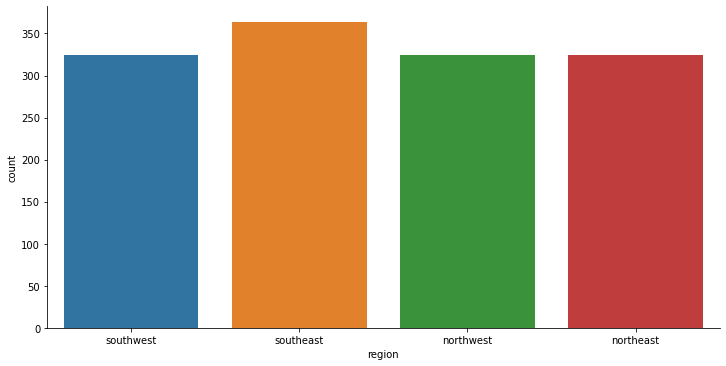

In [16]:
sn.catplot('region', data = insurance, kind = 'count', aspect = 2)

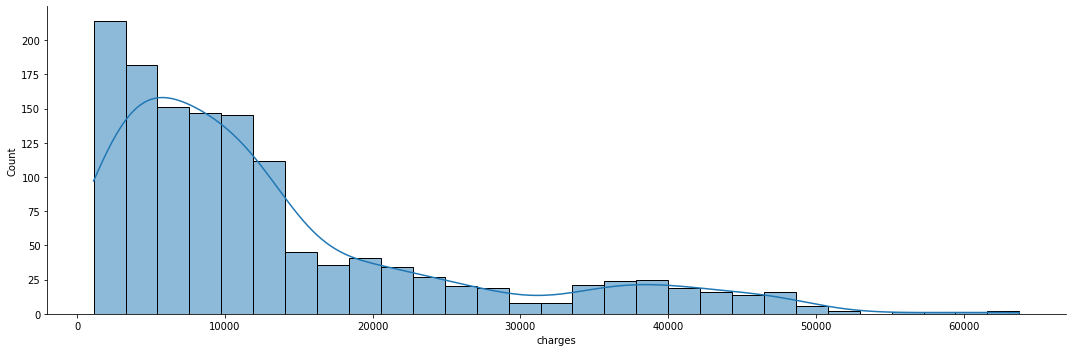

In [17]:
sn.displot(insurance.charges, kde = True, aspect = 3)

'\nlog_scale = True 参数设置可以进行对数变化。\n'

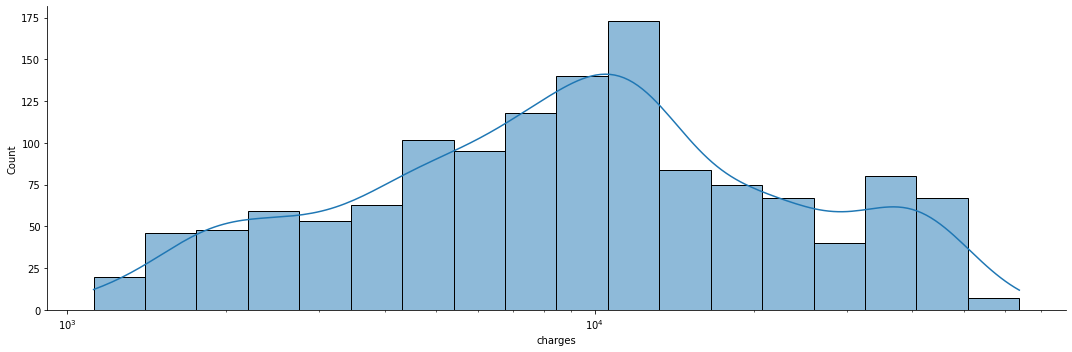

In [18]:
sn.displot(insurance.charges, log_scale = True, kde = True, aspect = 3)
'''
log_scale = True 参数设置可以进行对数变化。
'''

In [19]:
#将sex、smoker、region这三个类别变量编码，便于后续统计作图。

le = LabelEncoder()
le.fit(insurance['sex'])
insurance['sex'] = le.transform(insurance['sex'])

le = LabelEncoder()
le.fit(insurance['smoker'])
insurance['smoker'] = le.transform(insurance['smoker'])

le = LabelEncoder()
le.fit(insurance['region'])
insurance['region'] = le.transform(insurance['region'])

In [20]:
insurance.corr()['charges'].sort_values(ascending = False)
#是否抽烟与个人医疗费用呈现高度相关。

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

<AxesSubplot:>

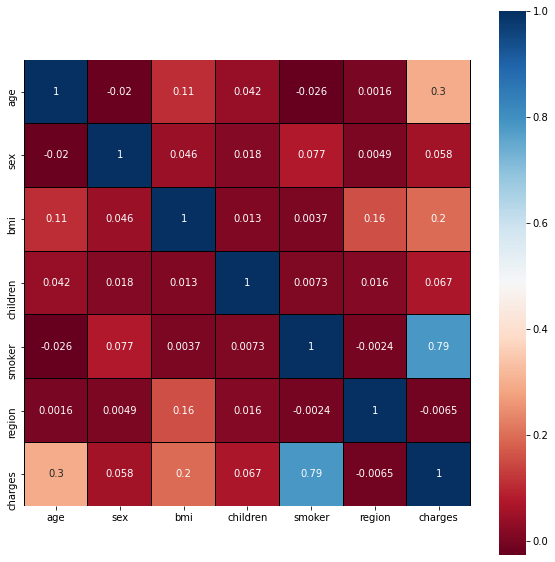

In [21]:
plt.figure(figsize = (10,10))
sn.heatmap(insurance.corr(), linewidths = .01, square = True, annot = True, cmap = 'RdBu', linecolor = 'black')

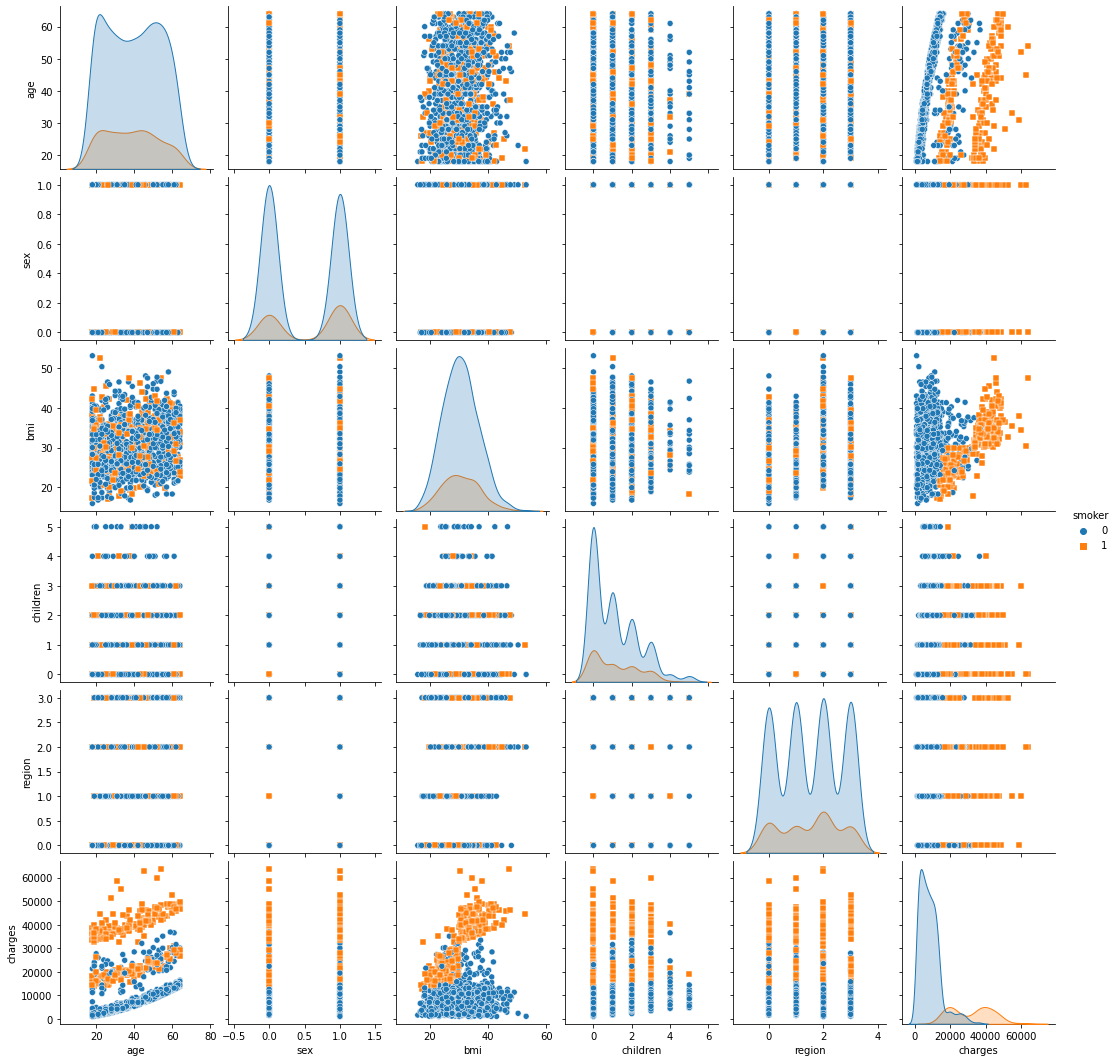

In [22]:
sn.pairplot(insurance, hue = 'smoker', markers=['o', 's']) 

'\n抽烟者和不抽烟者在医疗费用上的分布明显不同，抽烟者的医疗费用集中在右侧。\n'

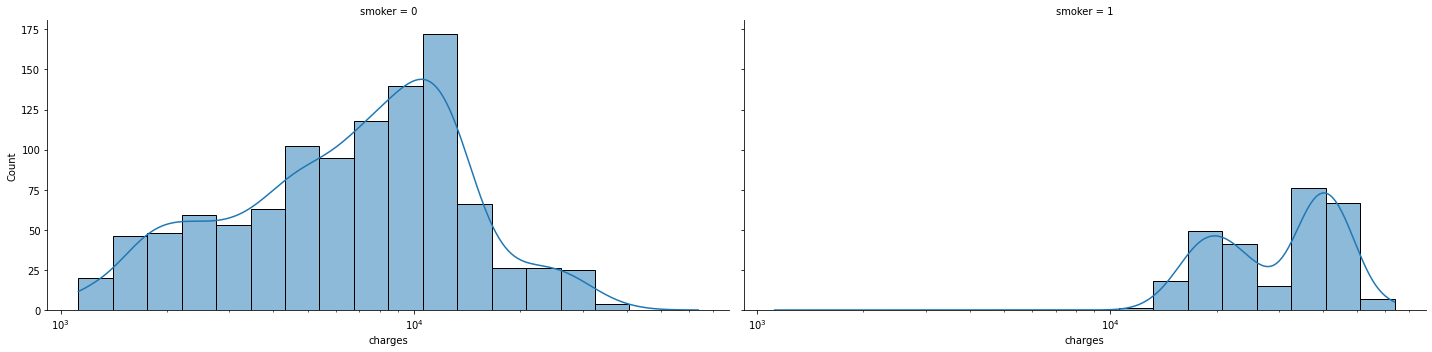

In [23]:
sn.displot(data = insurance, x = 'charges', col = 'smoker', log_scale = True, kde = True, aspect = 2)
'''
抽烟者和不抽烟者在医疗费用上的分布明显不同，抽烟者的医疗费用集中在右侧。
'''

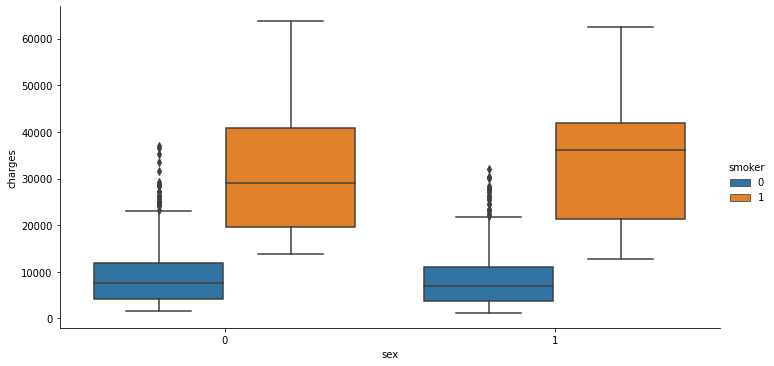

In [24]:
sn.catplot(data = insurance, x = "sex", y = "charges", hue = "smoker", kind = "box", aspect = 2)
#sex=0表示female，sex=1表示male

'\n即使在年轻人(小于等于25岁)中，抽烟者的个人医疗费用也明显高于不抽烟者；\n对于不抽烟者，出现了一些上方的异常值，考虑可能是由重大疾病或事故所导致。\n'

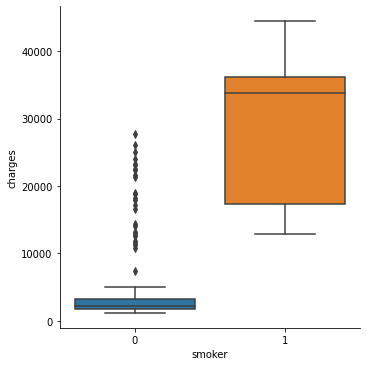

In [25]:
sn.catplot(data = insurance[insurance.age <= 25], x = "smoker", y = "charges", kind = "box", aspect = 1)
'''
即使在年轻人(小于等于25岁)中，抽烟者的个人医疗费用也明显高于不抽烟者；
对于不抽烟者，出现了一些上方的异常值，考虑可能是由重大疾病或事故所导致。
'''

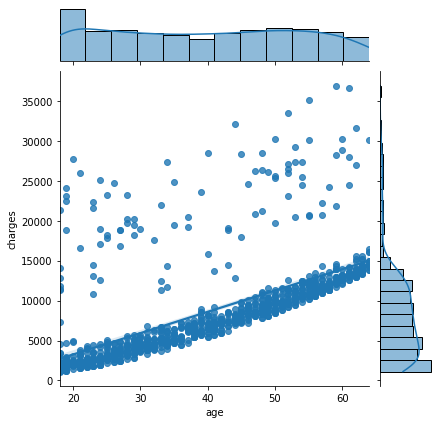

In [26]:
sn.jointplot(data = insurance[insurance.smoker == 0], x = "age", y = "charges", kind = "reg")

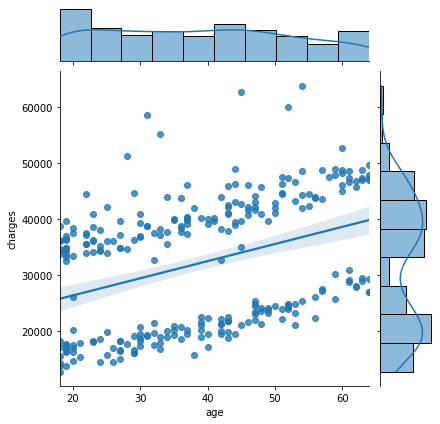

In [27]:
sn.jointplot(data = insurance[insurance.smoker == 1], x = "age", y = "charges", kind = "reg")

'\n对于不抽烟者，医疗费用随着年龄的增长而增长\n'

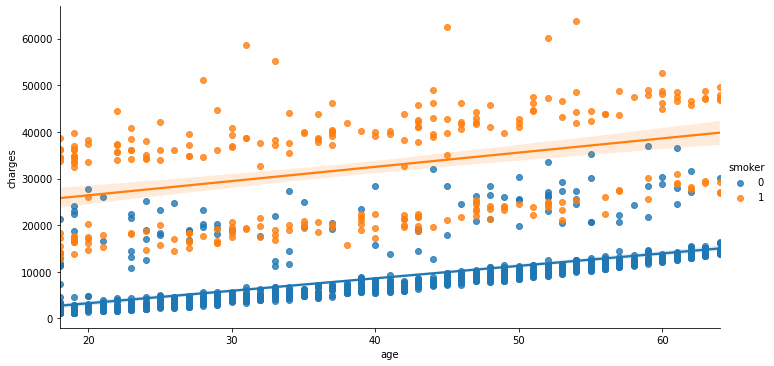

In [28]:
sn.lmplot(data = insurance, x = "age", y = "charges", hue = 'smoker', aspect = 2)

'''
对于不抽烟者，医疗费用随着年龄的增长而增长
'''

<img src="./BMI.png" style="zoom:25%" />


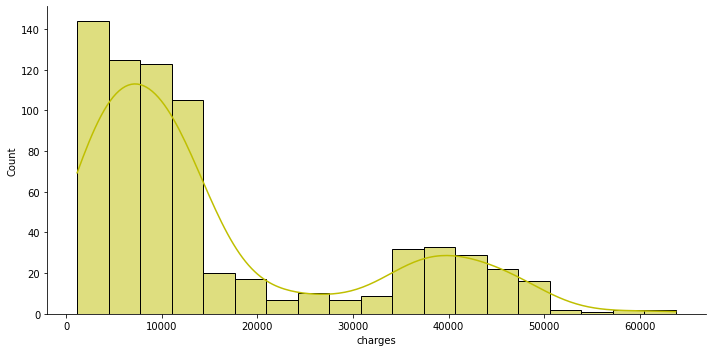

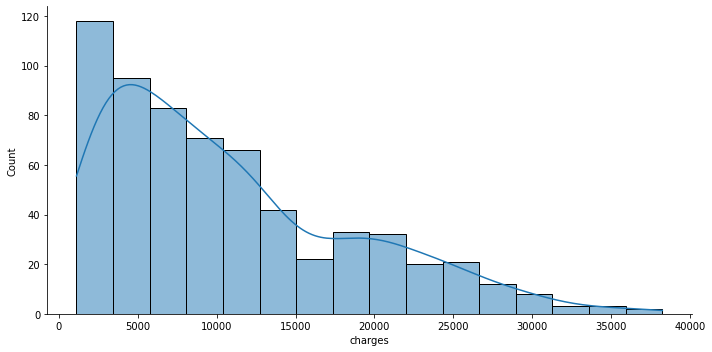

In [29]:
sn.displot(data = insurance[insurance.bmi >= 30], x = 'charges', kde = True, color ='y', aspect = 2)
sn.displot(data = insurance[insurance.bmi < 30], x = 'charges', kde = True, aspect =2)

'\n对于抽烟者，医疗费用与BMI呈明显的正向关系\n'

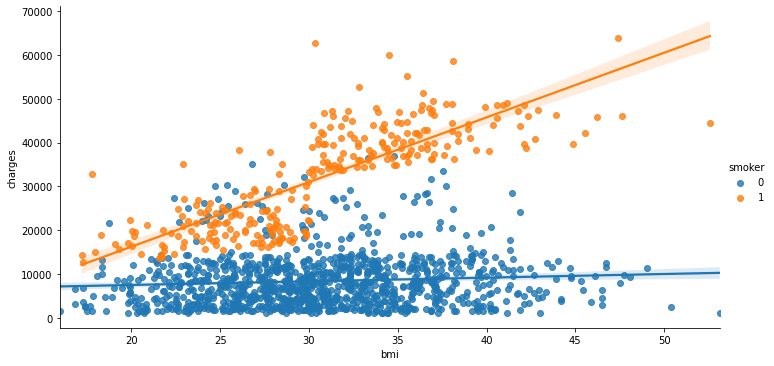

In [30]:
sn.lmplot(data = insurance, x = "bmi", y = "charges", hue = 'smoker', aspect = 2)

'''
对于抽烟者，医疗费用与BMI呈明显的正向关系
'''

In [42]:
for ft in insurance.drop(columns = 'charges').columns:
    insurance[ft] = (insurance[ft] - np.mean(insurance[ft])) / np.std(insurance[ft])
    
insurance.head()

,count,mean,std,min,25%,50%,75%,max
age,1337.0,1.328614e-17,1.000374,-1.511647,-0.870580,-0.015823,0.838934,1.764921
sex,1337.0,9.798528e-17,1.000374,-1.009771,-1.009771,0.990324,0.990324,0.990324
bmi,1337.0,-3.649536e-17,1.000374,-2.411119,-0.717173,-0.043202,0.661926,3.684136
children,1337.0,-1.396705e-16,1.000374,-0.909234,-0.909234,-0.079442,0.750351,3.239729
smoker,1337.0,4.801279e-16,1.000374,-0.507702,-0.507702,-0.507702,-0.507702,1.969660
region,1337.0,2.163150e-17,1.000374,-1.372274,-0.467128,0.438017,0.438017,1.343163
charges,1337.0,1.327912e+04,12110.359656,1121.873900,4746.344000,9386.161300,16657.717450,63770.428010


In [32]:
x = insurance.drop(columns = ['charges', 'region'])
y = insurance['charges']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.3, random_state = 1912) #划分训练集和测试集
print('训练样本数:',Xtrain.shape[0], '测试样本数:',Xtest.shape[0]) 

训练样本数: 935 测试样本数: 402


In [33]:
lr = LR()
lr.fit(Xtrain, Ytrain)

score_train = lr.score(Xtrain, Ytrain) 
score_test = lr.score(Xtest, Ytest) 

mse_train = mean_squared_error(Ytrain, lr.predict(Xtrain))
mse_test = mean_squared_error(Ytest, lr.predict(Xtest))

print('训练集上R2:',score_train,'测试集上R2:',score_test,
     '\n''训练集上MSE',mse_train,'测试集上MSE',mse_test)

训练集上R2: 0.7372993253715956 测试集上R2: 0.7752409746623226 
训练集上MSE 38633719.328423075 测试集上MSE 32668024.859760407


In [34]:
lr.coef_

array([3509.42730732,   33.72216146, 1835.46669459,  713.993678  ,
       9669.07938542])

In [35]:
co = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(lr.coef_)]
               ,axis = 1
               ,ignore_index = True
              )
co.columns = ['feature','coefficient']
co['coef_abs'] = np.abs(co.coefficient)
co.sort_values(by = 'coef_abs', ascending = False)

,feature,coefficient,coef_abs
4,smoker,9669.079385,9669.079385
0,age,3509.427307,3509.427307
2,bmi,1835.466695,1835.466695
3,children,713.993678,713.993678
1,sex,33.722161,33.722161


In [36]:
pf = PolynomialFeatures(degree = 2, interaction_only = True)
x_pf = pf.fit_transform(x)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_pf, y, test_size = 0.3, random_state = 1912) #划分训练集和测试集
print('训练样本数:',Xtrain.shape[0], '测试样本数:',Xtest.shape[0]) 

训练样本数: 935 测试样本数: 402


In [37]:
lr = LR()
lr.fit(Xtrain, Ytrain)

score_train = lr.score(Xtrain, Ytrain) 
score_test = lr.score(Xtest, Ytest) 

print('训练集上R2:',score_train,'测试集上R2:',score_test,
     '\n''训练集上MSE',mse_train,'测试集上MSE',mse_test)

训练集上R2: 0.8261325283961537 测试集上R2: 0.8698120375822141 
训练集上MSE 38633719.328423075 测试集上MSE 32668024.859760407


In [38]:
pf.get_feature_names(x.columns)

['1',
 'age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'age sex',
 'age bmi',
 'age children',
 'age smoker',
 'sex bmi',
 'sex children',
 'sex smoker',
 'bmi children',
 'bmi smoker',
 'children smoker']

In [39]:
lr.coef_

array([ 0.00000000e+00,  3.64418827e+03, -2.20390791e+02,  1.75999343e+03,
        7.15291246e+02,  9.51684952e+03,  3.78827913e+01,  2.08738971e+02,
       -1.04187588e+01, -6.59916677e+00, -7.73636849e+01, -1.76202016e+01,
        1.32988121e+02,  1.51106252e+01,  3.55009141e+03, -1.70027798e+02])

In [40]:
co = pd.concat([pd.DataFrame(pf.get_feature_names(x.columns)),pd.DataFrame(lr.coef_)]
               ,axis = 1
               ,ignore_index = True
              )
co.columns = ['feature','coefficient']
co['coef_abs'] = np.abs(co.coefficient)
co.sort_values(by = 'coef_abs', ascending = False)

,feature,coefficient,coef_abs
5,smoker,9516.849521,9516.849521
1,age,3644.188272,3644.188272
14,bmi smoker,3550.091414,3550.091414
3,bmi,1759.993429,1759.993429
4,children,715.291246,715.291246
2,sex,-220.390791,220.390791
7,age bmi,208.738971,208.738971
15,children smoker,-170.027798,170.027798
12,sex smoker,132.988121,132.988121
10,sex bmi,-77.363685,77.363685
